In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# getting data from all csv files
data_64 = np.genfromtxt('cloudlab_data/timing_data_64_bytes.csv', delimiter=',')[1:]
data_128 = np.genfromtxt('cloudlab_data/timing_data_128_bytes.csv', delimiter=',')[1:]
data_256 = np.genfromtxt('cloudlab_data/timing_data_256_bytes.csv', delimiter=',')[1:]
data_512 = np.genfromtxt('cloudlab_data/timing_data_512_bytes.csv', delimiter=',')[1:]
data_1024 = np.genfromtxt('cloudlab_data/timing_data_1024_bytes.csv', delimiter=',')[1:]
data_2048 = np.genfromtxt('cloudlab_data/timing_data_2048_bytes.csv', delimiter=',')[1:]
data_4096 = np.genfromtxt('cloudlab_data/timing_data_4096_bytes.csv', delimiter=',')[1:]
data_8192 = np.genfromtxt('cloudlab_data/timing_data_8192_bytes.csv', delimiter=',')[1:]
data_16384 = np.genfromtxt('cloudlab_data/timing_data_16384_bytes.csv', delimiter=',')[1:]
data_32768 = np.genfromtxt('cloudlab_data/timing_data_32768_bytes.csv', delimiter=',')[1:]
data_65536 = np.genfromtxt('cloudlab_data/timing_data_65536_bytes.csv', delimiter=',')[1:]

data_1048576 = np.genfromtxt('cloudlab_data/timing_data_1048576_bytes.csv', delimiter=',')[1:]
data_2097152 = np.genfromtxt('cloudlab_data/timing_data_2097152_bytes.csv', delimiter=',')[1:]
data = {"64": data_64, "128": data_128, "256": data_256, "512": data_512, "1024": data_1024, "2048": data_2048, "4096": data_4096, "8192": data_8192, "16384": data_16384, "32768": data_32768, "65536": data_65536, "1048576": data_1048576, "2097152": data_2097152}

In [6]:
#computing general stats around all of the data, mean for each one
for key, value in data.items():
    print(f"Mean for {key}: {np.mean(value[:,1])}")
    print(f"Median for {key}: {np.median(value[:,1])}")
    print(f"Standard Deviation for {key}: {np.std(value[:,1])}")
    print(f"Variance for {key}: {np.var(value[:,1])}")
    print(f"Minimum for {key}: {np.min(value[:,1])}")
    print(f"Maximum for {key}: {np.max(value[:,1])}")
    print(f"Range for {key}: {np.max(value[:,1]) - np.min(value[:,1])}")
    print()
    

# Plot time series for a few selected buffer sizes

timing_data = {
    64: data_64,
    128: data_128,
    256: data_256,
    512: data_512,
    1024: data_1024,
    2048: data_2048,
    4096: data_4096,
    8192: data_8192,
    16384: data_16384,
    32768: data_32768,
    65536: data_65536,
    1048576: data_1048576,
    2097152: data_2097152
}


Mean for 64: 393.91008
Median for 64: 375.0
Standard Deviation for 64: 141.43857321959098
Variance for 64: 20004.8699943936
Minimum for 64: 234.0
Maximum for 64: 15624.0
Range for 64: 15390.0

Mean for 128: 391.91541
Median for 128: 366.0
Standard Deviation for 128: 173.6868918903551
Variance for 128: 30167.1364145319
Minimum for 128: 240.0
Maximum for 128: 18597.0
Range for 128: 18357.0

Mean for 256: 400.49877
Median for 256: 357.0
Standard Deviation for 256: 206.39756989481998
Variance for 256: 42599.9568584871
Minimum for 256: 240.0
Maximum for 256: 23241.0
Range for 256: 23001.0

Mean for 512: 978.91272
Median for 512: 948.0
Standard Deviation for 512: 248.2538914140151
Variance for 512: 61629.994602201594
Minimum for 512: 282.0
Maximum for 512: 24960.0
Range for 512: 24678.0

Mean for 1024: 1474.23585
Median for 1024: 1467.0
Standard Deviation for 1024: 274.08704457667733
Variance for 1024: 75123.7080047775
Minimum for 1024: 507.0
Maximum for 1024: 32508.0
Range for 1024: 32001.0

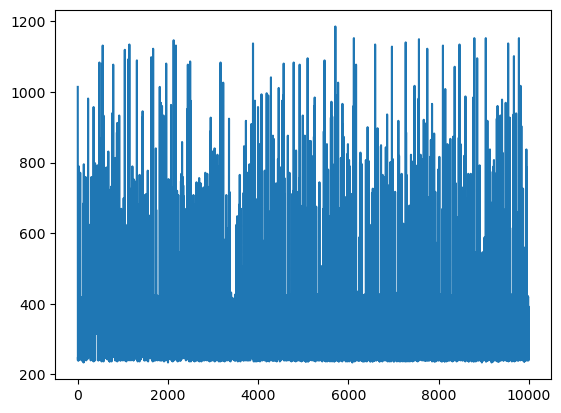

In [7]:
plt.plot(data_64[:10000,0], data_64[:10000,1])
plt.show()

[64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 1048576, 2097152]


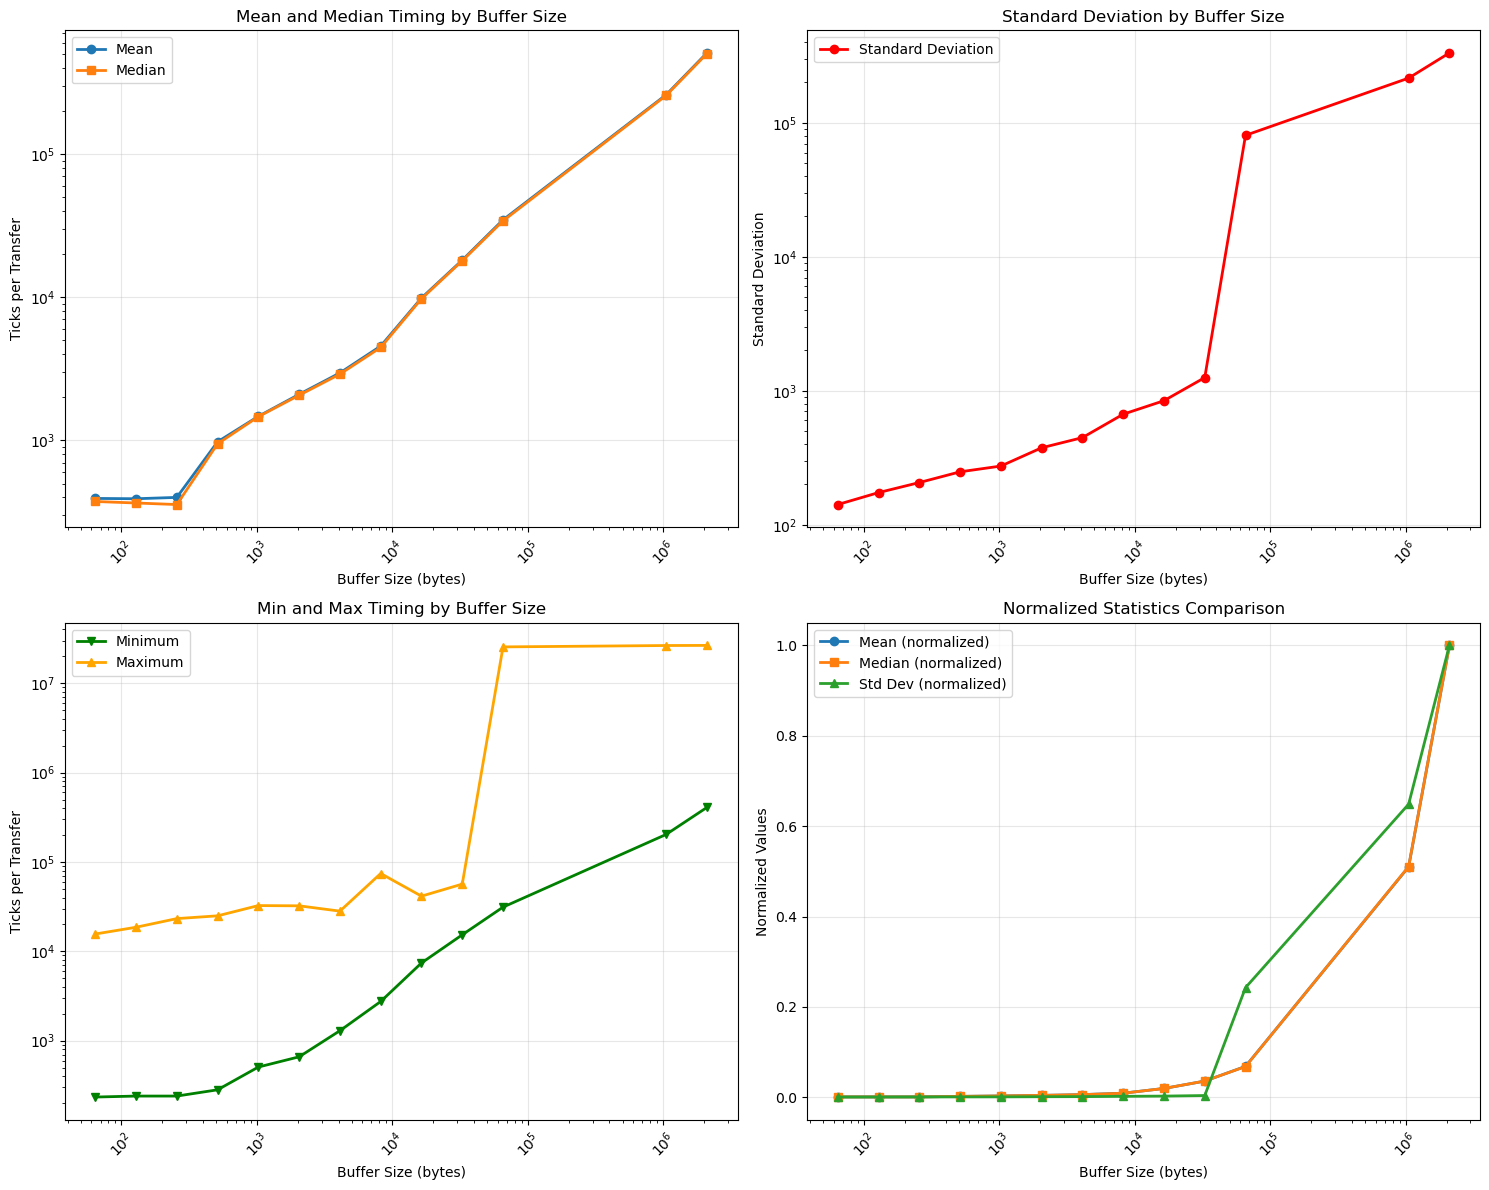

In [8]:
# Plot statistical measures with legend
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Extract buffer sizes and convert to integers for proper sorting
buffer_sizes = [int(k) for k in data.keys()]
buffer_sizes.sort()
buffer_labels = [str(size) for size in buffer_sizes]
print(buffer_sizes)
# Calculate statistics for each buffer size
means = [np.mean(data[str(size)][:,1]) for size in buffer_sizes]
medians = [np.median(data[str(size)][:,1]) for size in buffer_sizes]
stds = [np.std(data[str(size)][:,1]) for size in buffer_sizes]
mins = [np.min(data[str(size)][:,1]) for size in buffer_sizes]
maxs = [np.max(data[str(size)][:,1]) for size in buffer_sizes]

# Plot 1: Mean and Median
ax1.plot(buffer_sizes, means, 'o-', label='Mean', linewidth=2, markersize=6)
ax1.plot(buffer_sizes, medians, 's-', label='Median', linewidth=2, markersize=6)
ax1.set_xlabel('Buffer Size (bytes)')
ax1.set_ylabel('Ticks per Transfer')
ax1.set_title('Mean and Median Timing by Buffer Size')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Standard Deviation
ax2.plot(buffer_sizes, stds, 'o-', color='red', label='Standard Deviation', linewidth=2, markersize=6)
ax2.set_xlabel('Buffer Size (bytes)')
ax2.set_ylabel('Standard Deviation')
ax2.set_title('Standard Deviation by Buffer Size')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Min and Max
ax3.plot(buffer_sizes, mins, 'v-', label='Minimum', linewidth=2, markersize=6, color='green')
ax3.plot(buffer_sizes, maxs, '^-', label='Maximum', linewidth=2, markersize=6, color='orange')
ax3.set_xlabel('Buffer Size (bytes)')
ax3.set_ylabel('Ticks per Transfer')
ax3.set_title('Min and Max Timing by Buffer Size')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# Plot 4: All statistics together (normalized)
# Normalize each statistic to show relative patterns
means_norm = np.array(means) / np.max(means)
medians_norm = np.array(medians) / np.max(medians)
stds_norm = np.array(stds) / np.max(stds)

ax4.plot(buffer_sizes, means_norm, 'o-', label='Mean (normalized)', linewidth=2, markersize=6)
ax4.plot(buffer_sizes, medians_norm, 's-', label='Median (normalized)', linewidth=2, markersize=6)
ax4.plot(buffer_sizes, stds_norm, '^-', label='Std Dev (normalized)', linewidth=2, markersize=6)
ax4.set_xlabel('Buffer Size (bytes)')
ax4.set_ylabel('Normalized Values')
ax4.set_title('Normalized Statistics Comparison')
ax4.set_xscale('log')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


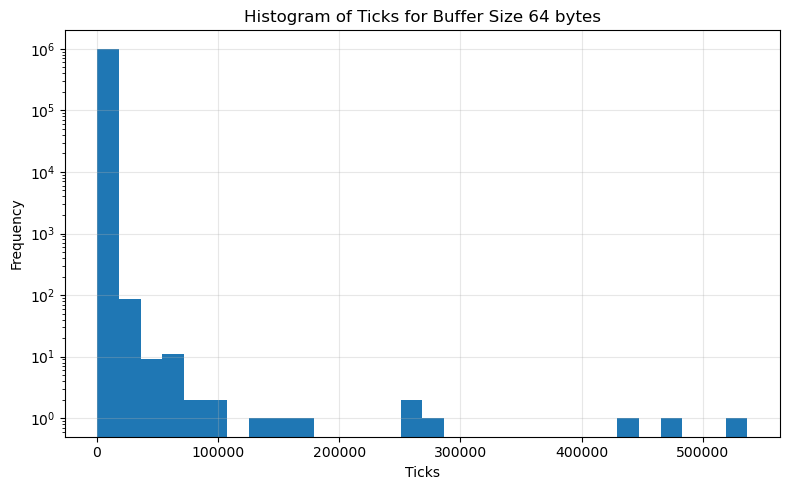

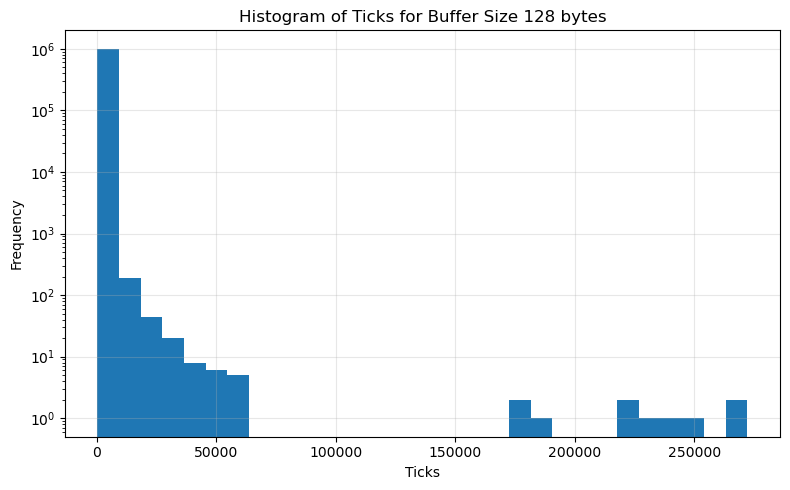

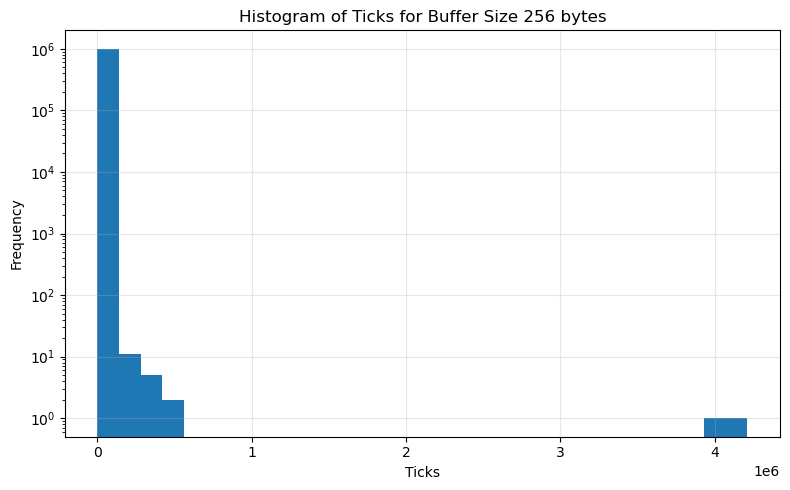

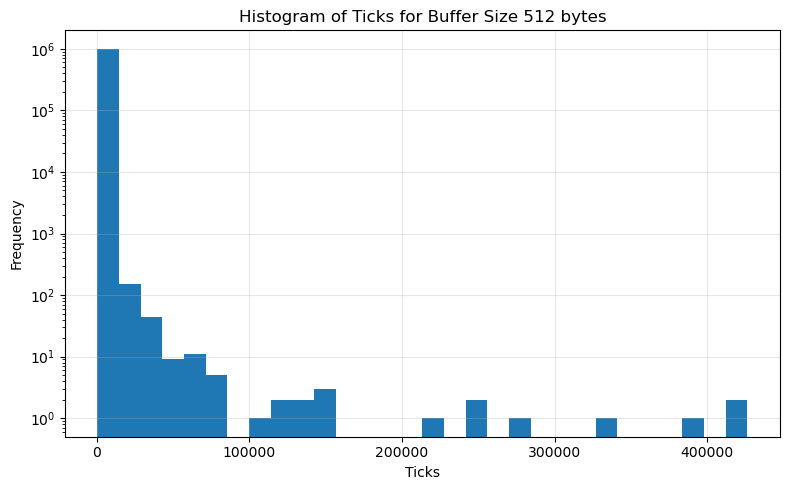

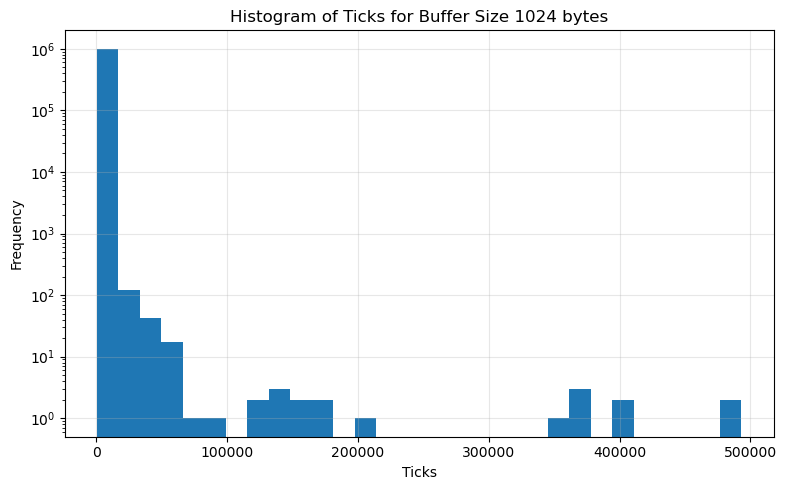

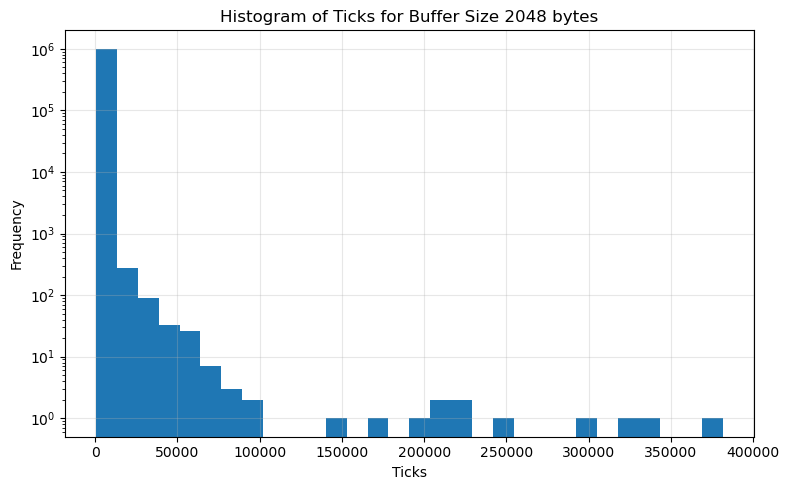

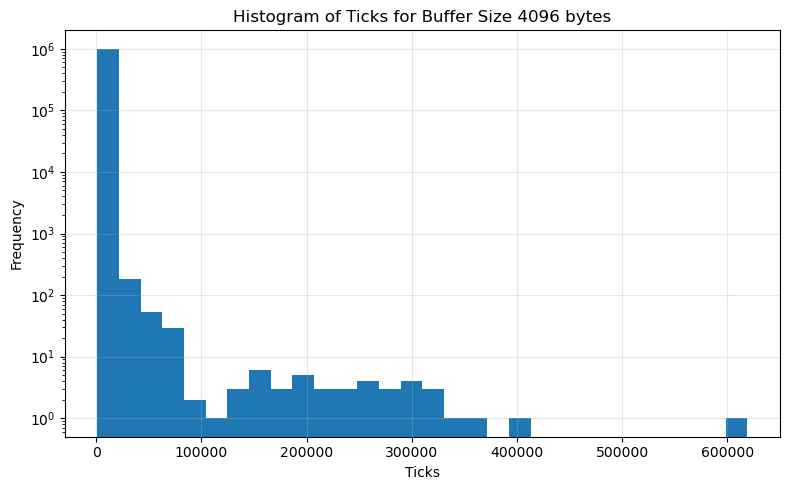

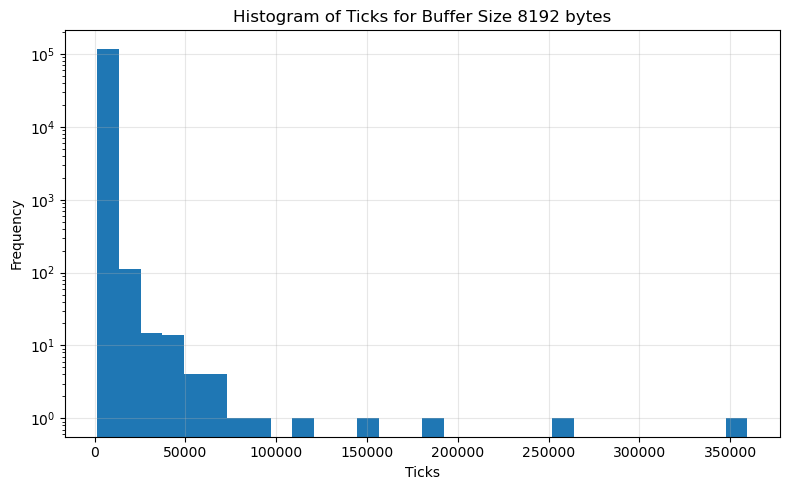

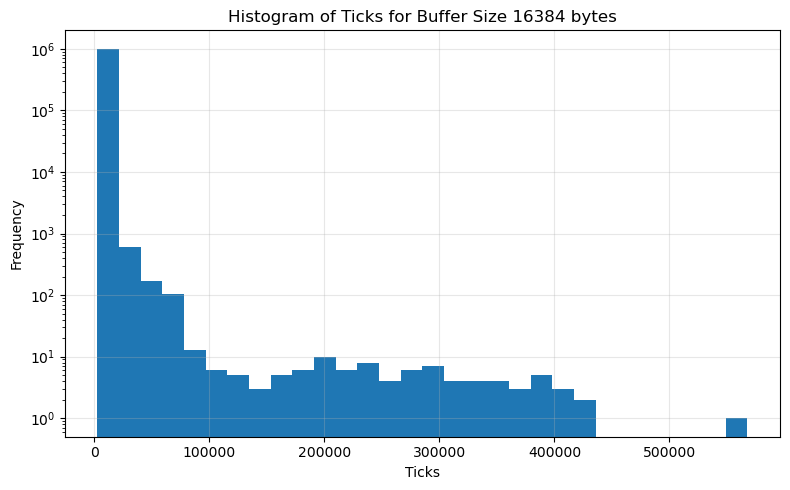

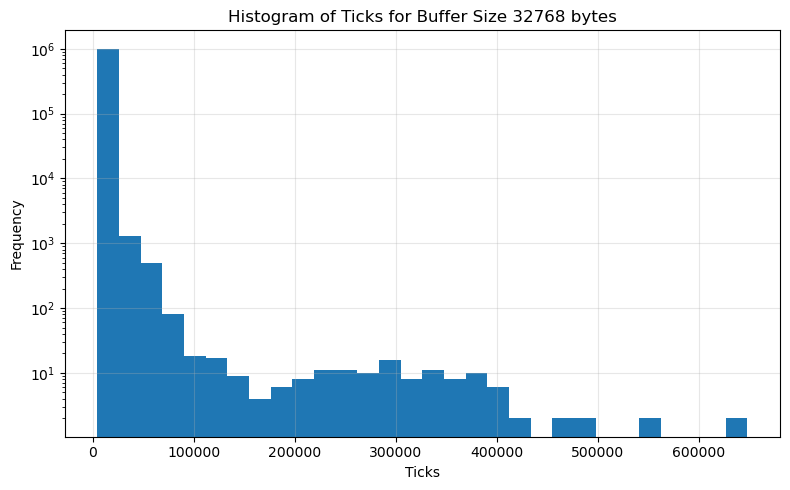

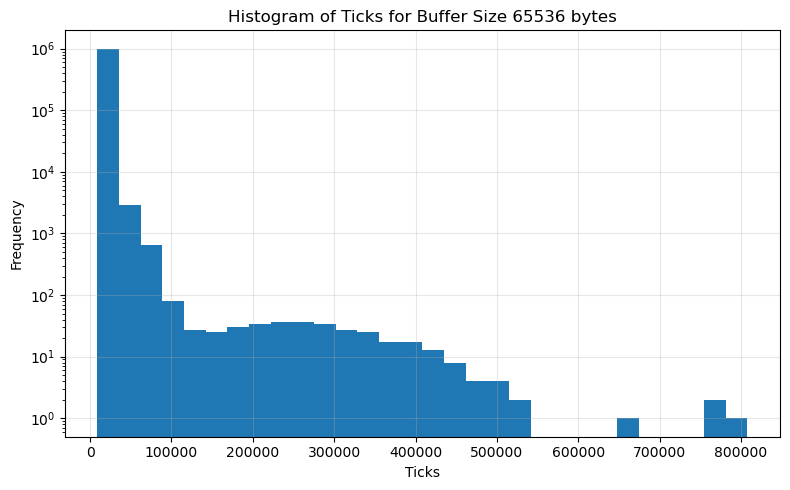

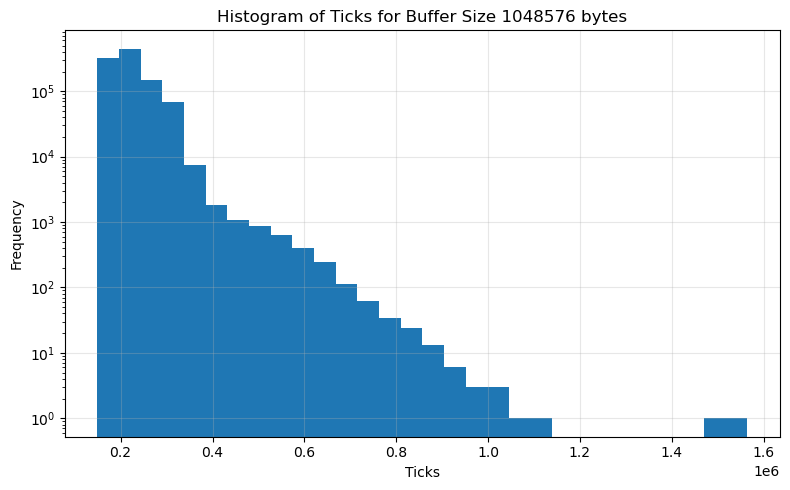

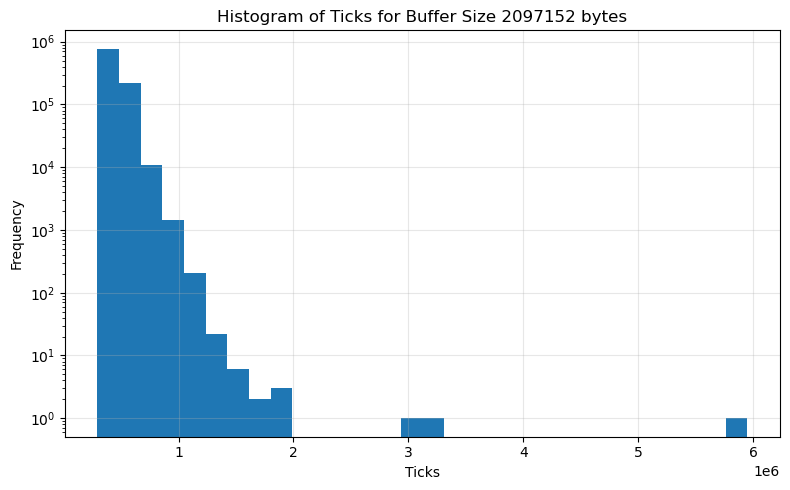

In [20]:
# INSERT_YOUR_CODE

# Make a histogram for each timing data set already loaded

# Assume timing_data is a dict mapping buffer size to list/array of ticks
# Example: timing_data = {64: [...], 128: [...], 8192: [...]}

for bufsize in timing_data:
    ticks = timing_data[bufsize][:,1]
    plt.figure(figsize=(8, 5))
    plt.hist(ticks, bins=30)
    plt.yscale('log')
    plt.title(f"Histogram of Ticks for Buffer Size {bufsize} bytes")
    plt.xlabel("Ticks")
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

